### Import the Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\VamsiMuramreddy\Desktop\Machine Learning\House.csv")
null = data.isnull().sum()
duplicates = data[data.duplicated()]

In [4]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
data.drop(columns = ['Posted On','Point of Contact'],inplace=True)

In [6]:
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


### Filtering Numericals and Categoricals Columns

In [7]:
categ =[]
for feature in data.columns:
    if ((data[feature].dtypes=='O') & (feature not in 'Rent')):
        categ.append(feature)
print(categ)
nume = []
for feature in data.columns:
    if (feature not in categ) & (feature not in 'Rent'):
        nume.append(feature)
print(nume)

['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred']
['BHK', 'Size', 'Bathroom']


### Changing DataTypes to 'int'

In [8]:
data["Area Type"] = le.fit_transform(data["Area Type"])
data["Floor"] = le.fit_transform(data["Floor"])
data["Area Locality"] = le.fit_transform(data["Area Locality"])
data["City"] = le.fit_transform(data["City"])
data["Furnishing Status"] = le.fit_transform(data["Furnishing Status"])
data["Tenant Preferred"] = le.fit_transform(data["Tenant Preferred"])

In [9]:
data.dtypes

BHK                  int64
Rent                 int64
Size                 int64
Floor                int32
Area Type            int32
Area Locality        int32
City                 int32
Furnishing Status    int32
Tenant Preferred     int32
Bathroom             int64
dtype: object

In [10]:
data.to_csv(r"C:\Users\VamsiMuramreddy\Desktop\Machine Learning\Health_clean.csv")
data1 = pd.read_csv(r"C:\Users\VamsiMuramreddy\Desktop\Machine Learning\Health_clean.csv")

### Univariate Analysis (Categorical)

<AxesSubplot:xlabel='City', ylabel='Count'>

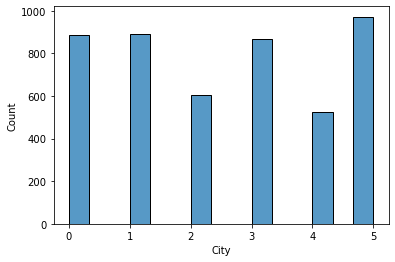

In [11]:
sns.histplot(data1['City'])

<AxesSubplot:xlabel='Floor', ylabel='Count'>

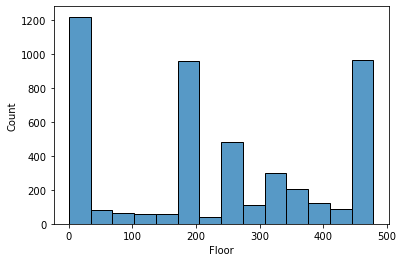

In [12]:
sns.histplot(data1['Floor'])

<AxesSubplot:xlabel='Area Type', ylabel='Count'>

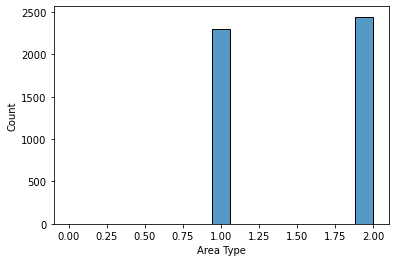

In [13]:
sns.histplot(data1['Area Type'])

<AxesSubplot:xlabel='Furnishing Status', ylabel='Count'>

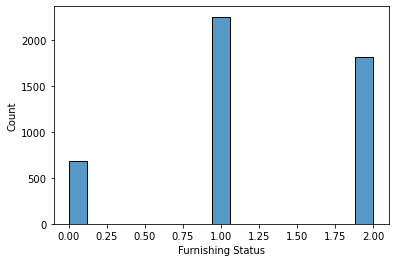

In [14]:
sns.histplot(data1['Furnishing Status'])

<AxesSubplot:xlabel='Tenant Preferred', ylabel='Count'>

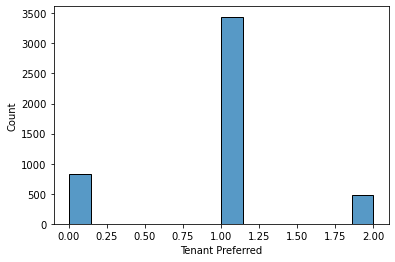

In [54]:
sns.histplot(data1['Tenant Preferred'])

### Numericals Using Distplot()

<AxesSubplot:xlabel='BHK', ylabel='Density'>

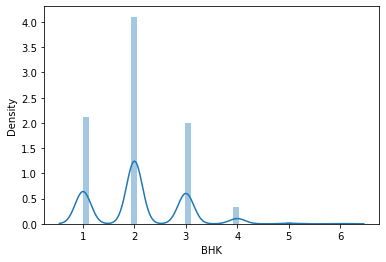

In [55]:
sns.distplot(data['BHK'])

<AxesSubplot:xlabel='Bathroom', ylabel='Density'>

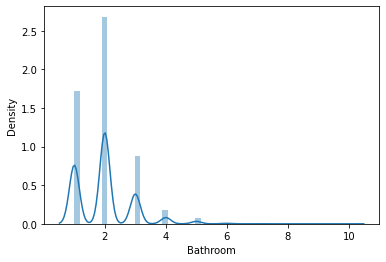

In [56]:
sns.distplot(data['Bathroom'])

<AxesSubplot:xlabel='Size', ylabel='Density'>

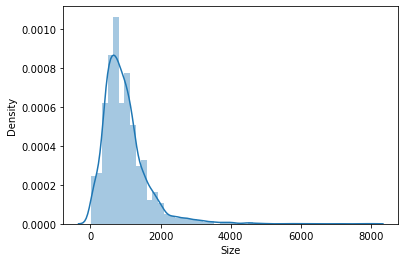

In [57]:
sns.distplot(data['Size'])

### Outliers

In [98]:
data_nume = data[nume]
data_nume.describe()
Q1 = data_nume.quantile(0.25)
Q3 = data_nume.quantile(0.75)
IQR = Q3 - Q1
IQR
((data_nume<(Q1 - 1.5 * IQR)) | (data_nume > (Q3 + 1.5 * IQR)) ).any()

BHK         True
Size        True
Bathroom    True
dtype: bool

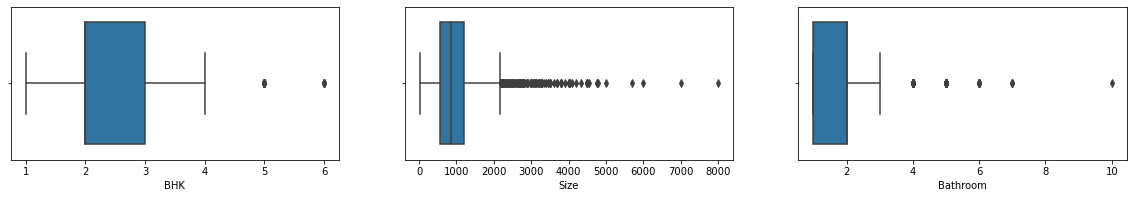

In [102]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1
for num in nume:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[num])
    plt.xlabel(num)
    plotnumber+=1
plt.show()

### Correlation

<AxesSubplot:>

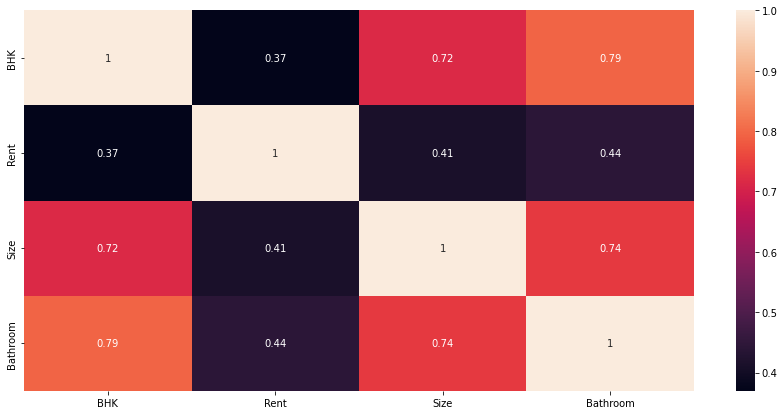

In [103]:
cor_mat = data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

### Modeling